In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
train_df=pd.read_csv('train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24727 entries, 0 to 24726
Data columns (total 6 columns):
Id                24727 non-null int64
Province_State    10507 non-null object
Country_Region    24727 non-null object
Date              24727 non-null object
ConfirmedCases    24727 non-null float64
Fatalities        24727 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [3]:
train_df.head(5)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [6]:
train_df[train_df['Province_State'].notnull()]['Country_Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'US', 'United Kingdom'], dtype=object)

In [8]:
train_df[train_df['Country_Region'] == 'Italy'].sort_values(by='Date',ascending=False)[:5]

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
11612,16723,NaN,Italy,2020-04-09,143626.0,18279.0
11611,16722,NaN,Italy,2020-04-08,139422.0,17669.0
11610,16721,NaN,Italy,2020-04-07,135586.0,17127.0
11609,16720,NaN,Italy,2020-04-06,132547.0,16523.0
11608,16719,NaN,Italy,2020-04-05,128948.0,15887.0


In [9]:
by_country=train_df.groupby(['Country_Region'])
country_list=[]
cnfrm_case_world={}
for country,data in by_country:
    cnfrm_case_world.update({country:max(data['ConfirmedCases'])})
    

In [10]:
cnfrm_case_world['US']

161779.0

In [11]:
from collections import Counter
k = Counter(cnfrm_case_world) 

top_countries=k.most_common(5)
top_ctrys=[]
top_ctrys_cases=[]
for item in top_countries:
    top_ctrys.append(item[0])
    top_ctrys_cases.append(item[1])

In [12]:
top_ctrys , top_ctrys_cases

(['US', 'Spain', 'Italy', 'Germany', 'France'],
 [161779.0, 153222.0, 143626.0, 118181.0, 117749.0])

In [21]:
top_ctrys_df=pd.DataFrame({'top_ctrys':top_ctrys,'top_ctrys_cases':top_ctrys_cases})

In [27]:
top_ctrys_df['top_ctrys_cases'] = top_ctrys_df['top_ctrys_cases'].astype('int32')

top_ctrys_df['top_ctrys_cases'].values

array([161779, 153222, 143626, 118181, 117749])

<BarContainer object of 5 artists>

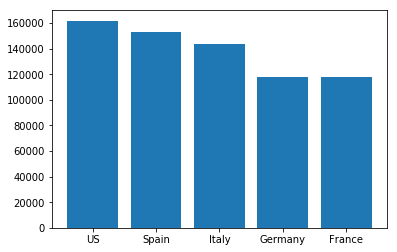

In [26]:
import matplotlib.pyplot as plt
plt.bar(range(len(top_countries)),top_ctrys_cases,tick_label=top_ctrys)

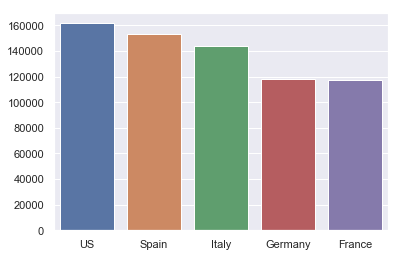

In [29]:
sns.set()
sns.barplot(top_ctrys,top_ctrys_cases)

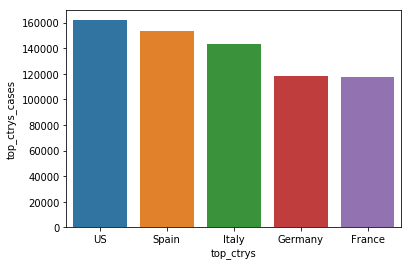

In [17]:
sns.barplot(x='top_ctrys',y='top_ctrys_cases',data=top_ctrys_df)

In [58]:
ctry_date_wise=pd.DataFrame(columns=['Date','ConfirmedCases','Fatalities'])

In [106]:
ctry_date_wise=pd.DataFrame(columns=['Country','Date','ConfirmedCases','Fatalities'])
def top_ctrys_cases(ctrylist):
    global ctry_date_wise
    for ctry in ctrylist:
        #print(ctry)
        ctry_data=train_df[train_df['Country_Region']==ctry]
        ctry_data['Date']=pd.to_datetime(ctry_data['Date'])
        ctry_by_date=ctry_data.groupby(['Date'],sort=False)
        for a,b in ctry_by_date:
            ctry_date_wise=ctry_date_wise.append({'Country':ctry,'Date':a,'ConfirmedCases':b['ConfirmedCases'].sum(),'Fatalities':b['Fatalities'].sum()},ignore_index=True)
            #print(b['Country_Region'])
        

In [147]:
ctry_date_wise['Country'].unique()

array(['US', 'Spain', 'Italy', 'Germany', 'France'], dtype=object)

In [107]:

top_ctrys_cases(top_ctrys)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [108]:
ctry_date_wise.head()

,Country,Date,ConfirmedCases,Fatalities
0,US,2020-01-22,0.0,0.0
1,US,2020-01-23,0.0,0.0
2,US,2020-01-24,0.0,0.0
3,US,2020-01-25,0.0,0.0
4,US,2020-01-26,0.0,0.0


In [109]:
px.line(ctry_date_wise,x='Date',y='ConfirmedCases',color='Country')

In [123]:
rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 32, 'ytick.labelsize': 32}
sns.set(rc=rc)
plt.figure(figsize=(50,30))

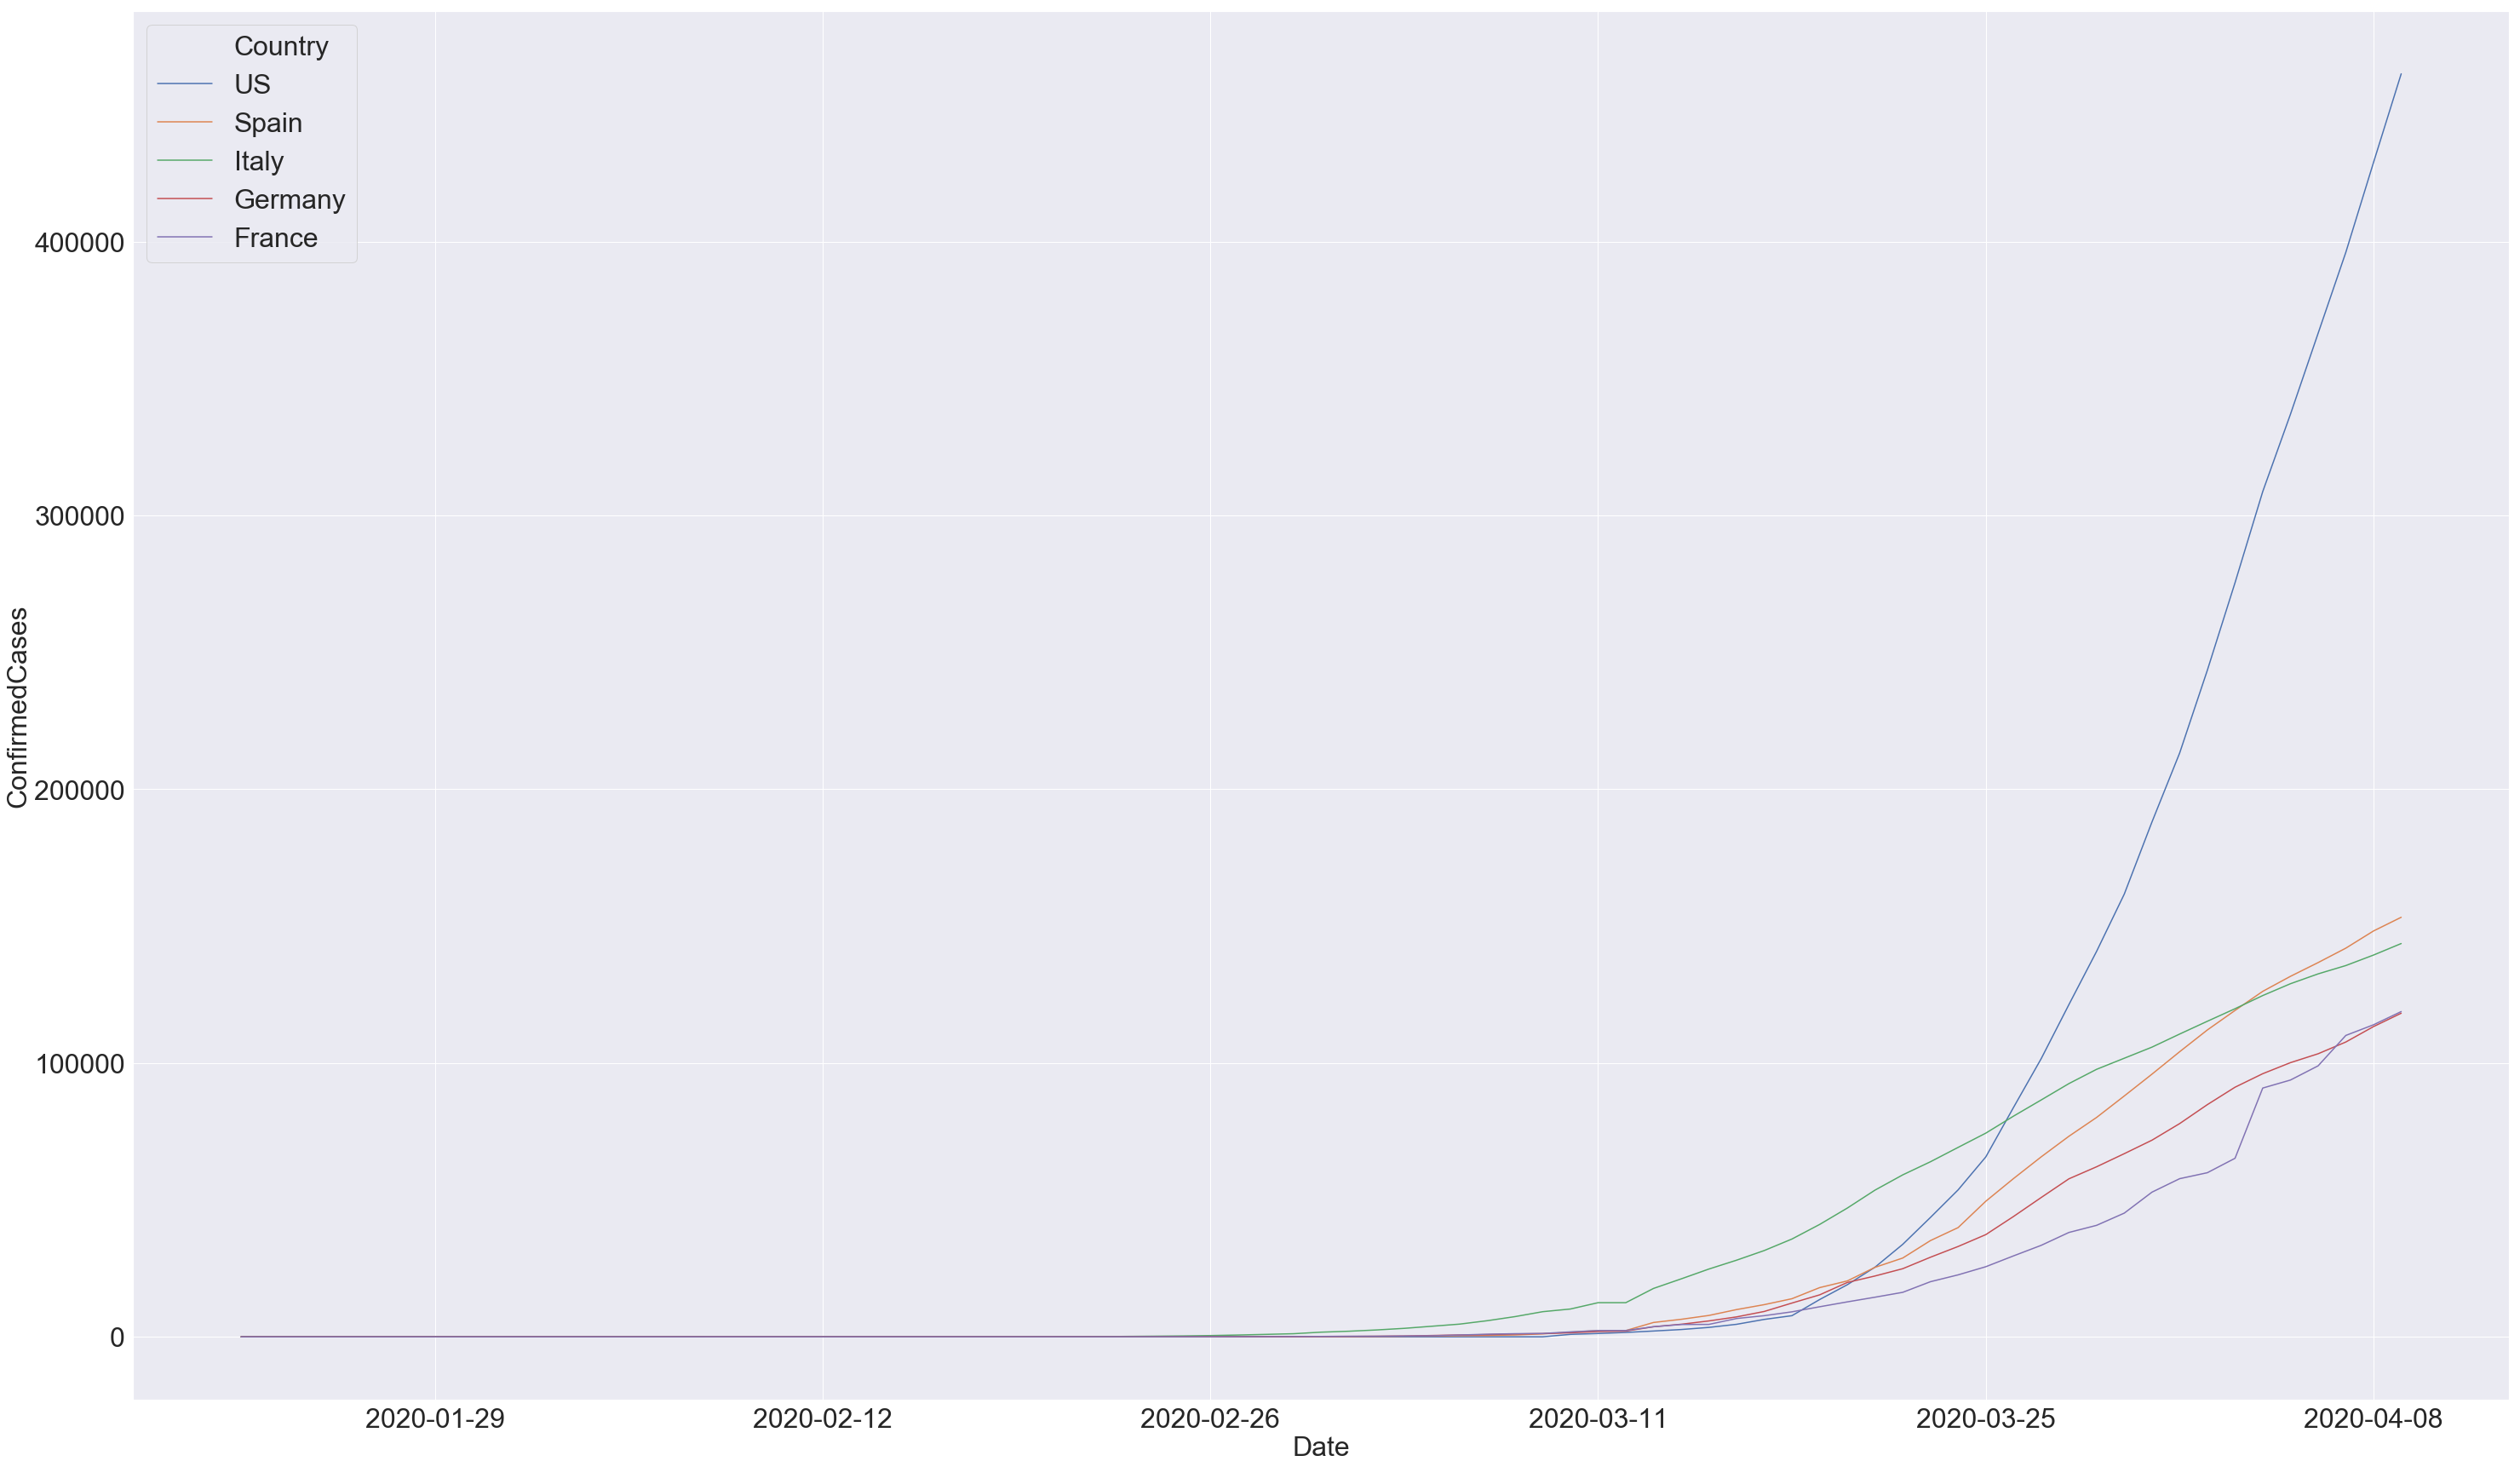

In [124]:

sns.lineplot(x='Date',y='ConfirmedCases',data=ctry_date_wise,hue='Country')


In [133]:
len(ctry_date_wise[ctry_date_wise['Country']=='Spain']['ConfirmedCases']) , len(ctry_date_wise[ctry_date_wise['Country']=='Spain']['Date'])

(79, 79)

In [135]:
plt.rcParams["figure.figsize"] = (20,10)

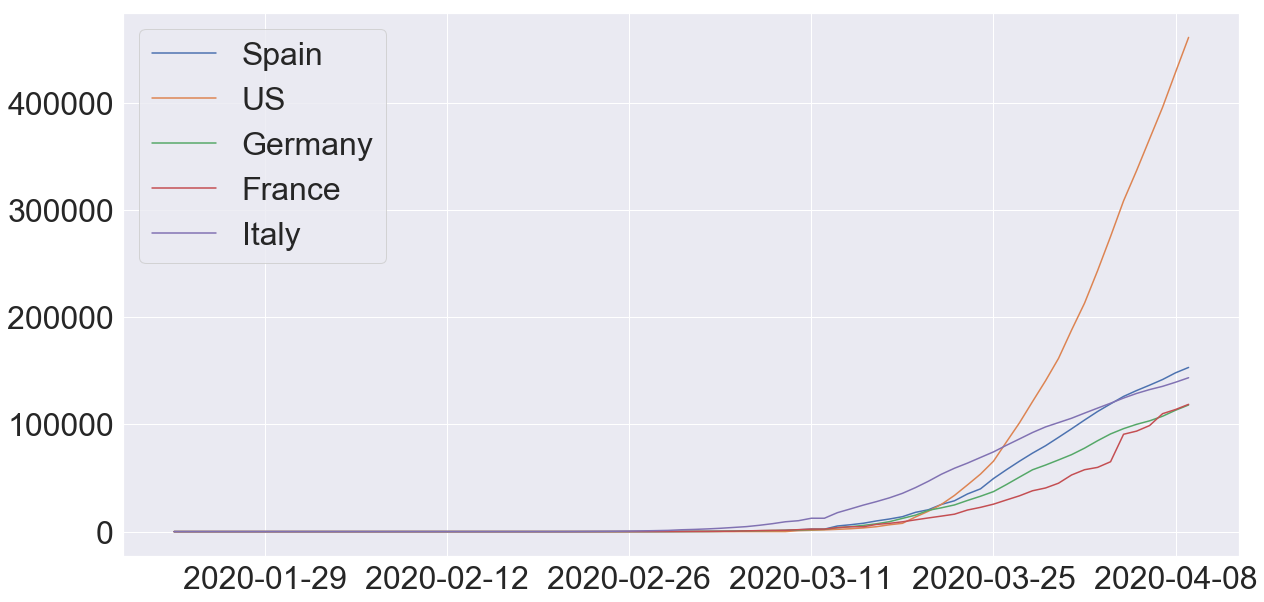

<Figure size 7200x2160 with 0 Axes>

In [150]:
plt.plot(ctry_date_wise[ctry_date_wise['Country']=='Spain']['Date'],
         ctry_date_wise[ctry_date_wise['Country']=='Spain']['ConfirmedCases'],label='Spain')
plt.plot(ctry_date_wise[ctry_date_wise['Country']=='US']['Date'],
         ctry_date_wise[ctry_date_wise['Country']=='US']['ConfirmedCases'],label='US')
plt.plot(ctry_date_wise[ctry_date_wise['Country']=='Germany']['Date'],
         ctry_date_wise[ctry_date_wise['Country']=='Germany']['ConfirmedCases'],label='Germany')
plt.plot(ctry_date_wise[ctry_date_wise['Country']=='France']['Date'],
         ctry_date_wise[ctry_date_wise['Country']=='France']['ConfirmedCases'],label='France')
plt.plot(ctry_date_wise[ctry_date_wise['Country']=='Italy']['Date'],
         ctry_date_wise[ctry_date_wise['Country']=='Italy']['ConfirmedCases'],label='Italy')
plt.legend()
plt.figure(figsize=(100,30))
plt.show()